In [91]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import os

In [73]:
# 2. Load data
df = pd.read_csv(r'...\data\predictive_maintenance.csv')

In [74]:
# 3. Basic info
print(df.info())
print(df['Failure Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             

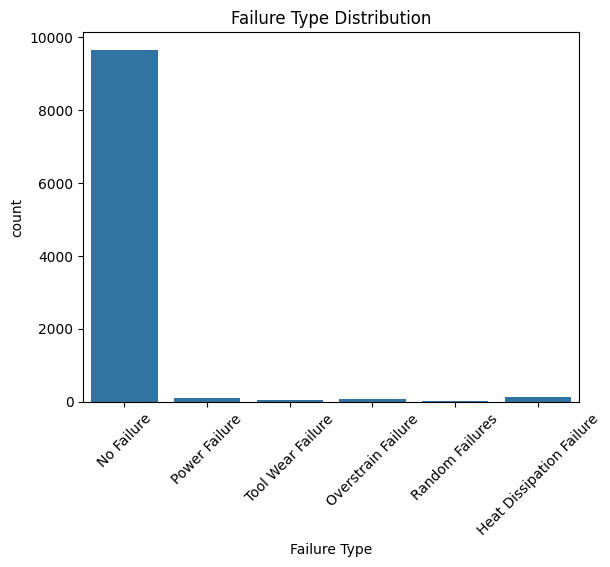

In [75]:
# 4. Visual: Failure distribution
sns.countplot(x='Failure Type', data=df)
plt.xticks(rotation=45)
plt.title("Failure Type Distribution")
plt.show()

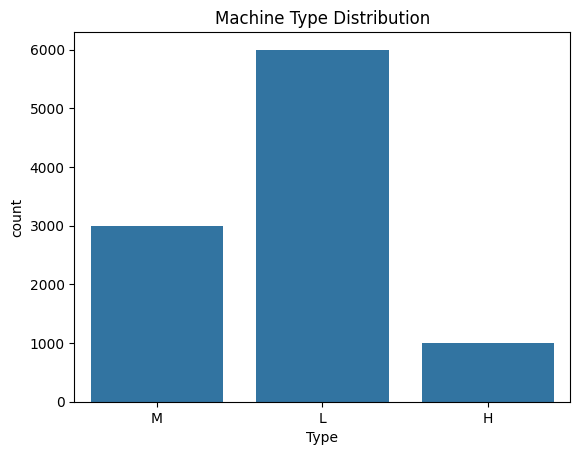

In [76]:
# 5. Visual: Machine type
sns.countplot(x="Type", data = df)
plt.title("Machine Type Distribution")
plt.show()

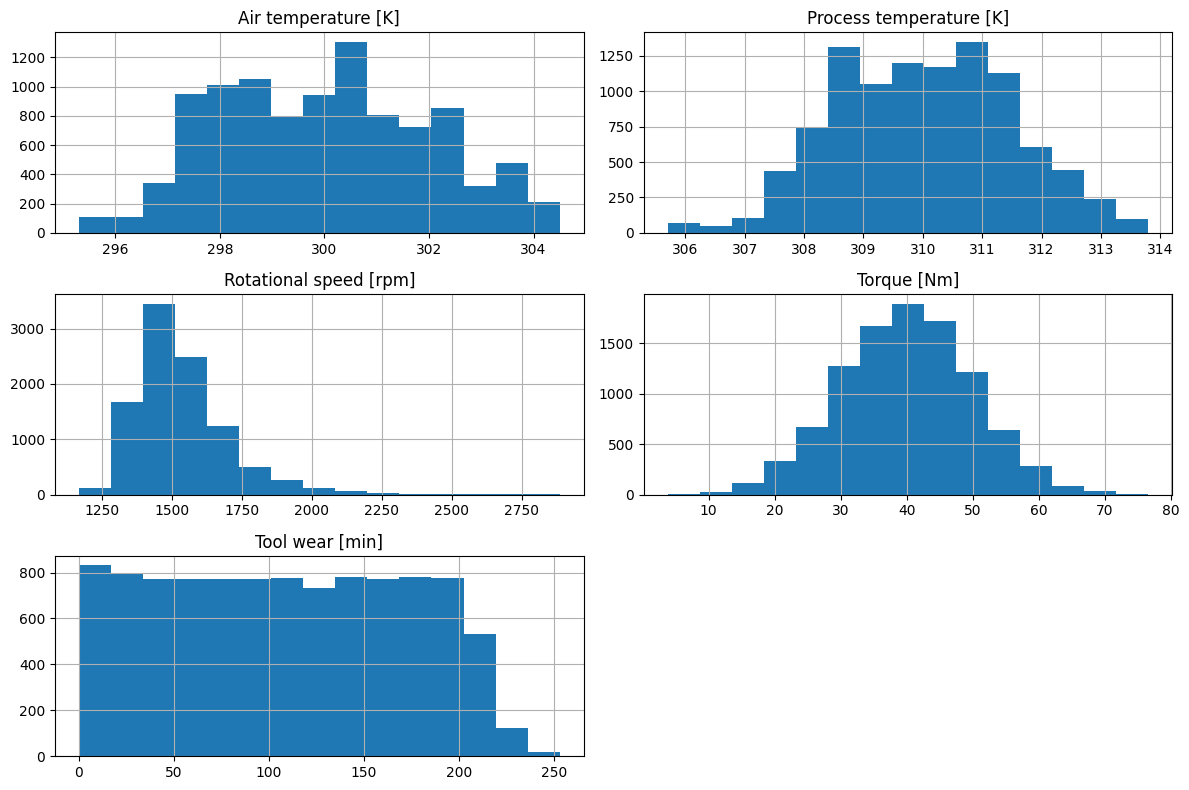

In [77]:
# 6. Visual: Histograms
numeric_features = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
df[numeric_features].hist(bins=15, figsize=(12,8))
plt.tight_layout()
plt.show()

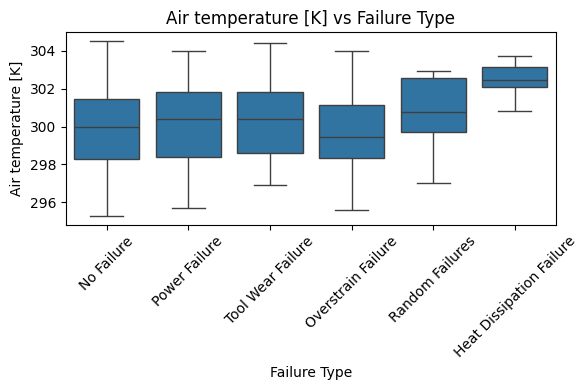

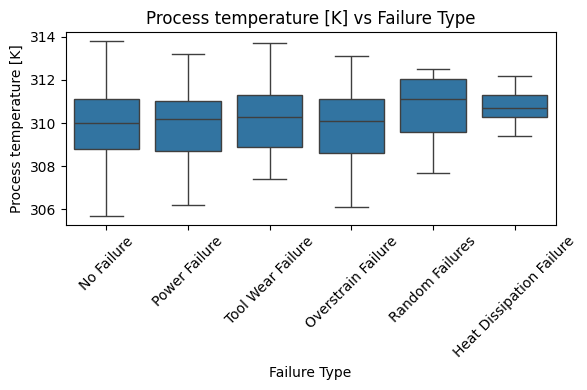

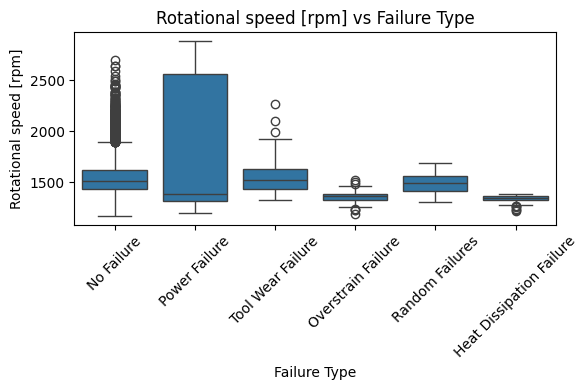

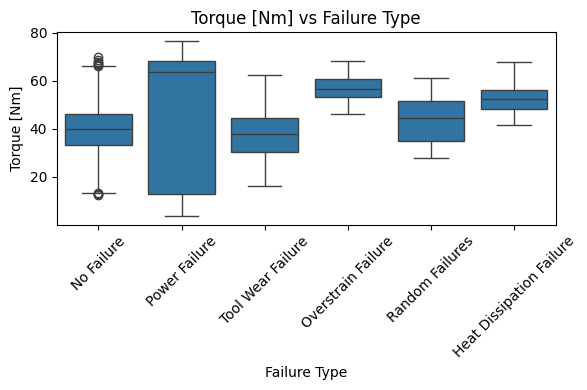

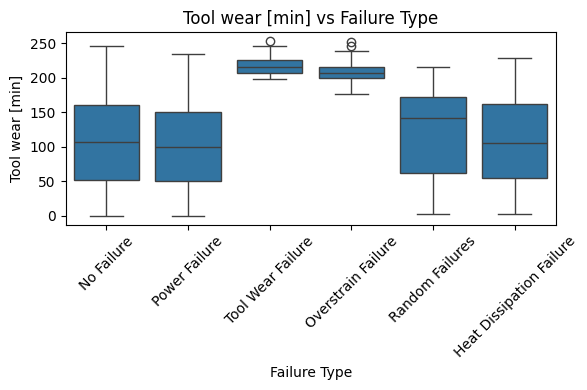

In [78]:
# 7. Box plots
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Failure Type', y=col, data=df)
    plt.title(f"{col} vs Failure Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

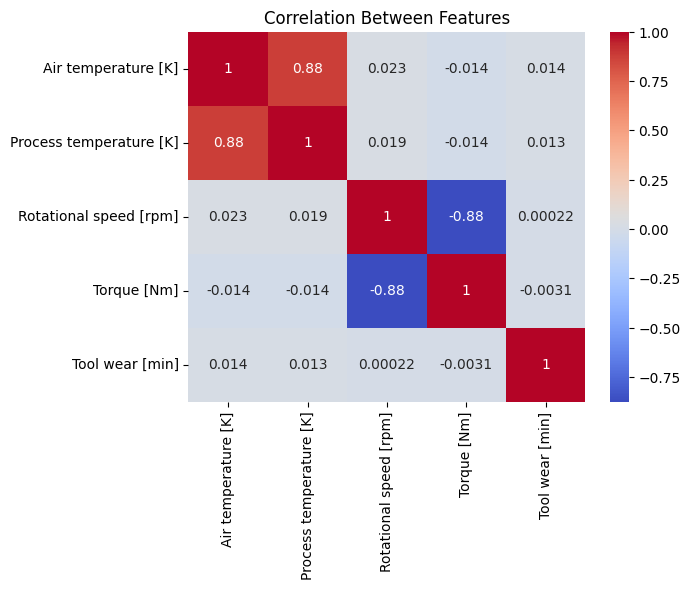

In [79]:
# 8. Correlation
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [80]:
# 9. Clean and encode
df.drop(columns=['UDI','Product ID', 'Target'], inplace=True)
df.columns = df.columns.str.replace(r"[\[\]<>]", "", regex=True)

le = LabelEncoder()
df['Failure Type'] = le.fit_transform(df['Failure Type'])
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [81]:
# 10. Train-test split
X = df.drop(columns=['Failure Type'])
y = df['Failure Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
# 11. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# 12. Save processed data
os.makedirs("data/processed", exist_ok=True)
joblib.dump((X_train_scaled, X_test_scaled, y_train, y_test, le, X.columns.tolist()), r'D:\Documents\Courses\Data Science\Predicitve_Maintenance_Project\data\processed\processed_data.pkl')
print("Processed data saved successfully.")

Processed data saved successfully.
